In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)



In [2]:
df1=pd.read_csv('bengaluru_house_price.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

Now first task is to calculate the price...for that i dont need 'area_type','location','balcony','availability'columns.....for overall project i need that column but not for this calculation.....And this project is based on "Supervised Learning"

In [5]:
df2=df1.drop(['area_type','location','balcony','availability'],axis='columns')
df2.head()

,size,society,total_sqft,bath,price
0,2 BHK,Coomee,1056,2.0,39.07
1,4 Bedroom,Theanmp,2600,5.0,120.00
2,3 BHK,NaN,1440,2.0,62.00
3,3 BHK,Soiewre,1521,3.0,95.00
4,2 BHK,NaN,1200,2.0,51.00


In [6]:
df2.isnull().sum()
# now using this we can get number of "NaN" values in all the columns

size            16
society       5502
total_sqft       0
bath            73
price            0
dtype: int64

In [7]:
df3=df2.dropna()
df3.isnull().sum()

size          0
society       0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df3

,size,society,total_sqft,bath,price
0,2 BHK,Coomee,1056,2.0,39.07
1,4 Bedroom,Theanmp,2600,5.0,120.00
3,3 BHK,Soiewre,1521,3.0,95.00
5,2 BHK,DuenaTa,1170,2.0,38.00
6,4 BHK,Jaades,2732,4.0,204.00
...,...,...,...,...,...
13313,3 BHK,Aklia R,1345,2.0,57.00
13314,3 BHK,SoosePr,1715,3.0,112.00
13315,5 Bedroom,ArsiaEx,3453,4.0,231.00
13317,2 BHK,Mahla T,1141,2.0,60.00


In [9]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '3 Bedroom', '1 RK',
       '1 BHK', '5 BHK', '11 BHK', '5 Bedroom', '9 BHK', '6 Bedroom',
       '2 Bedroom', '9 Bedroom', '6 BHK', '7 BHK', '10 Bedroom',
       '8 Bedroom', '18 Bedroom'], dtype=object)

In [10]:
df3['BHK']=df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3

<ipython-input-10-71da60711c67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


,size,society,total_sqft,bath,price,BHK
0,2 BHK,Coomee,1056,2.0,39.07,2
1,4 Bedroom,Theanmp,2600,5.0,120.00,4
3,3 BHK,Soiewre,1521,3.0,95.00,3
5,2 BHK,DuenaTa,1170,2.0,38.00,2
6,4 BHK,Jaades,2732,4.0,204.00,4
...,...,...,...,...,...,...
13313,3 BHK,Aklia R,1345,2.0,57.00,3
13314,3 BHK,SoosePr,1715,3.0,112.00,3
13315,5 Bedroom,ArsiaEx,3453,4.0,231.00,5
13317,2 BHK,Mahla T,1141,2.0,60.00,2


In [11]:
df3['BHK'].unique()

array([ 2,  4,  3,  1,  5, 11,  9,  6,  7, 10,  8, 18], dtype=int64)

In [12]:
df3['total_sqft'].unique()

array(['1056', '2600', '1521', ..., '1919', '2111', '4689'], dtype=object)

In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df3[~df3['total_sqft'].apply(is_float)].head(10)
# so like this we can get all the inputs which are in "range".

,size,society,total_sqft,bath,price,BHK
30,4 BHK,LedorSa,2100 - 2850,4.0,186.000,4
122,4 BHK,SNontle,3067 - 8156,4.0,477.000,4
137,2 BHK,Vaarech,1042 - 1105,2.0,54.005,2
165,2 BHK,Kinuerg,1145 - 1340,2.0,43.490,2
188,2 BHK,MCvarar,1015 - 1540,2.0,56.800,2
549,2 BHK,Shxorm,1195 - 1440,2.0,63.770,2
661,2 BHK,Rarthne,1120 - 1145,2.0,48.130,2
672,4 Bedroom,Toainnt,3090 - 5002,4.0,445.000,4
772,2 BHK,Brens7,1160 - 1195,2.0,59.935,2
850,2 BHK,PrarePa,1115 - 1130,2.0,58.935,2


In [15]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))//2
    try:
        return float(x)
    except:
        return None
    

In [16]:
convert_sqft_to_num('1195 - 1440')

1317.0

In [17]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,size,society,total_sqft,bath,price,BHK
0,2 BHK,Coomee,1056.0,2.0,39.07,2
1,4 Bedroom,Theanmp,2600.0,5.0,120.00,4
3,3 BHK,Soiewre,1521.0,3.0,95.00,3
5,2 BHK,DuenaTa,1170.0,2.0,38.00,2
6,4 BHK,Jaades,2732.0,4.0,204.00,4


Upto here we have performed data cleaning.........
Now from here we will do feature engineering......

In [18]:
df5=df4.copy()
df5.drop(['society'],axis='columns',inplace=True)
df5.head()


,size,total_sqft,bath,price,BHK
0,2 BHK,1056.0,2.0,39.07,2
1,4 Bedroom,2600.0,5.0,120.00,4
3,3 BHK,1521.0,3.0,95.00,3
5,2 BHK,1170.0,2.0,38.00,2
6,4 BHK,2732.0,4.0,204.00,4


In [19]:
df5['location']=df1.location.copy()
df5.head()
# len(df5)

,size,total_sqft,bath,price,BHK,location
0,2 BHK,1056.0,2.0,39.07,2,Electronic City Phase II
1,4 Bedroom,2600.0,5.0,120.00,4,Chikka Tirupathi
3,3 BHK,1521.0,3.0,95.00,3,Lingadheeranahalli
5,2 BHK,1170.0,2.0,38.00,2,Whitefield
6,4 BHK,2732.0,4.0,204.00,4,Old Airport Road


In [20]:
len(df5.location.unique())
df5['location']
df5.head()

,size,total_sqft,bath,price,BHK,location
0,2 BHK,1056.0,2.0,39.07,2,Electronic City Phase II
1,4 Bedroom,2600.0,5.0,120.00,4,Chikka Tirupathi
3,3 BHK,1521.0,3.0,95.00,3,Lingadheeranahalli
5,2 BHK,1170.0,2.0,38.00,2,Whitefield
6,4 BHK,2732.0,4.0,204.00,4,Old Airport Road


In [21]:
len(df5.location.unique())

648

In [22]:
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']

df5.head()
df5.location.head()

0    Electronic City Phase II
1            Chikka Tirupathi
3          Lingadheeranahalli
5                  Whitefield
6            Old Airport Road
Name: location, dtype: object

In [23]:
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           413
Sarjapur  Road       329
Electronic City      236
Kanakpura Road       220
Thanisandra          213
                    ... 
Hennur Bande           1
Hanumagiri             1
Raghavendra Nagar      1
Raghuvanahalli         1
 Banaswadi             1
Name: location, Length: 647, dtype: int64

In [24]:
len(df5.location.unique())
# here, applying encoding is difficult...so decrease the number of unique values....

648

In [25]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
R.T. Nagar           10
Arekere              10
BTM Layout           10
HBR Layout           10
Dairy Circle         10
                     ..
Hennur Bande          1
Hanumagiri            1
Raghavendra Nagar     1
Raghuvanahalli        1
 Banaswadi            1
Name: location, Length: 499, dtype: int64

In [26]:
df5.location=df5.location.apply(lambda x:"other" if x in location_stats_less_than_10 else x)
df5.location

0        Electronic City Phase II
1                Chikka Tirupathi
3              Lingadheeranahalli
5                      Whitefield
6                Old Airport Road
                   ...           
13313                 Uttarahalli
13314           Green Glen Layout
13315                  Whitefield
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
Name: location, Length: 7748, dtype: object

In [27]:
len(df5.location.unique())
# compare it with the upper one...now we can apply encoding

150

In [28]:
df5.head(5)

,size,total_sqft,bath,price,BHK,location,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,2,Electronic City Phase II,3699.810606
1,4 Bedroom,2600.0,5.0,120.00,4,Chikka Tirupathi,4615.384615
3,3 BHK,1521.0,3.0,95.00,3,Lingadheeranahalli,6245.890861
5,2 BHK,1170.0,2.0,38.00,2,Whitefield,3247.863248
6,4 BHK,2732.0,4.0,204.00,4,Old Airport Road,7467.057101


now you have to be very practical when u work in poject like this...........
....so here i am going to perform some operation to remove anomalies........

In [29]:
df5[df5['total_sqft']/df5['BHK']<250]

,size,total_sqft,bath,price,BHK,location,price_per_sqft
349,3 Bedroom,11.0,3.0,74.0,3,other,672727.272727
483,5 Bedroom,1200.0,5.0,190.0,5,other,15833.333333
783,6 Bedroom,900.0,7.0,76.0,6,other,8444.444444
3097,5 Bedroom,1200.0,5.0,195.0,5,other,16250.000000
3523,10 Bedroom,1200.0,10.0,105.0,10,Jigani,8750.000000
4828,4 Bedroom,900.0,2.0,115.0,4,other,12777.777778
5582,5 Bedroom,1200.0,7.0,125.0,5,Bommanahalli,10416.666667
6028,6 BHK,1200.0,6.0,180.0,6,Banashankari,15000.000000
6140,2 BHK,497.0,1.0,17.0,2,Marsur,3420.523139
6813,9 Bedroom,600.0,9.0,90.0,9,Sector 2 HSR Layout,15000.000000


In [30]:
df5.shape

(7748, 7)

In [31]:
# now this negation operation helps us to remove according to operation
df6=df5[~(df5['total_sqft']/df5['BHK']<250)]
df6.head()
# print(len(df6))


,size,total_sqft,bath,price,BHK,location,price_per_sqft
0,2 BHK,1056.0,2.0,39.07,2,Electronic City Phase II,3699.810606
1,4 Bedroom,2600.0,5.0,120.00,4,Chikka Tirupathi,4615.384615
3,3 BHK,1521.0,3.0,95.00,3,Lingadheeranahalli,6245.890861
5,2 BHK,1170.0,2.0,38.00,2,Whitefield,3247.863248
6,4 BHK,2732.0,4.0,204.00,4,Old Airport Road,7467.057101


In [32]:
df6.price_per_sqft.describe()

count     7712.000000
mean      5906.713552
std       2759.454252
min        371.428571
25%       4299.069761
50%       5358.936725
75%       6748.198589
max      76530.612245
Name: price_per_sqft, dtype: float64

In [33]:
# now i am gonna keep the data which is in the range ---> (mean-standar_deviation)<=data<=(mean+standar_deviation)
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape
# (mean-standar_deviation)<=data<=(mean+standard_deviation) this formula is purely 

(6054, 7)

one more anomaly which we noticed is that..... 
for a given location a 2BHK flats price cant be more than or equal to a 3 BHK flat's price.
Now you can check this by using plt.scatter.....


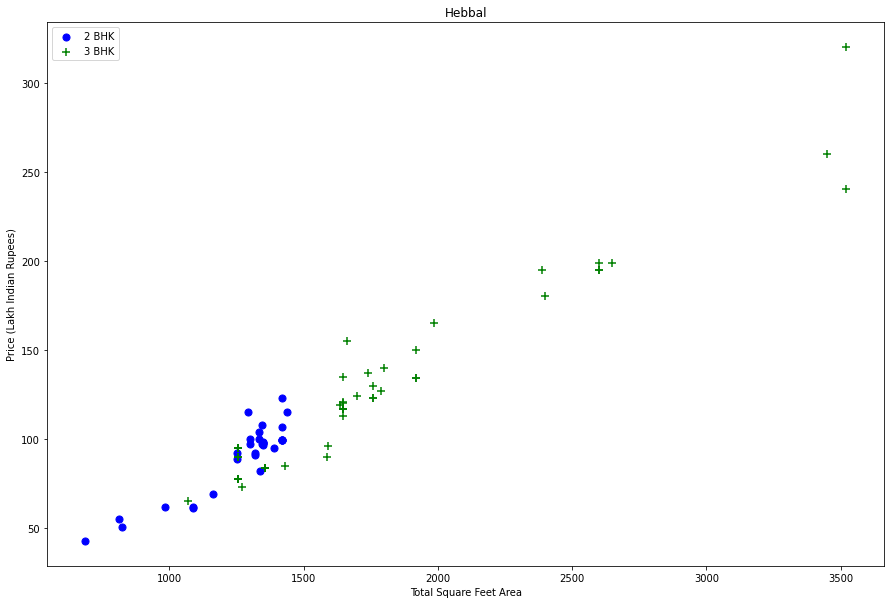

In [34]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Hebbal")



Removing those anomaly...

In [35]:
# df7.groupby('location').head()

In [36]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(4191, 7)

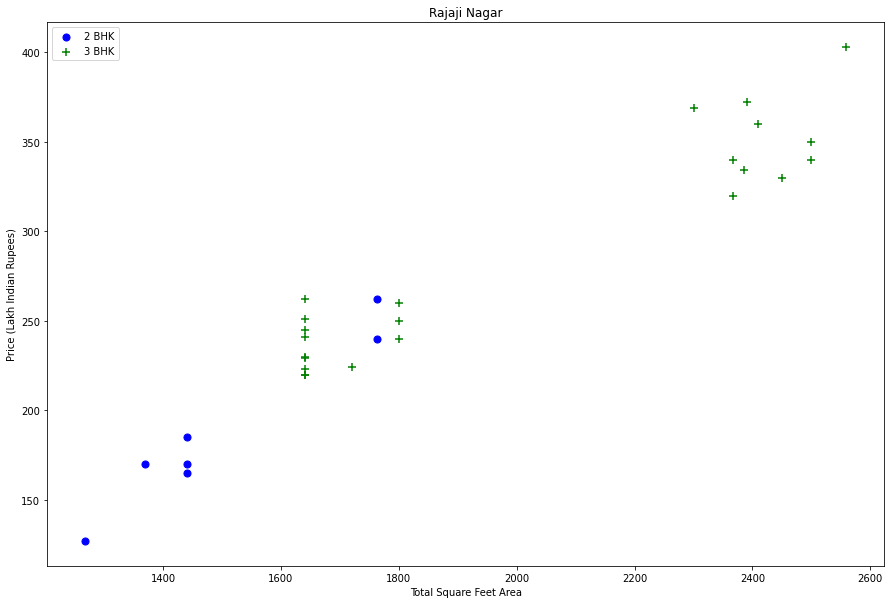

In [37]:
plot_scatter_chart(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

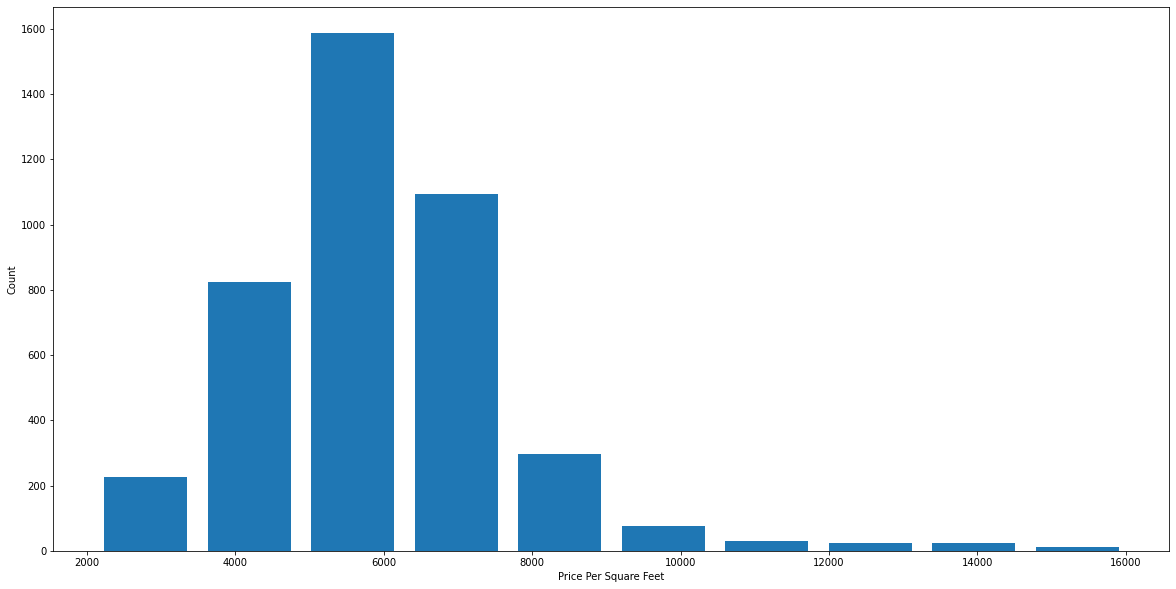

In [38]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [39]:
df8.bath.unique()

array([4., 3., 2., 5., 1., 6., 7., 9.])

In [40]:
df8[df8.bath>=10]

,size,total_sqft,bath,price,BHK,location,price_per_sqft


In [41]:
df8[df8.bath>df8.BHK+2]

,size,total_sqft,bath,price,BHK,location,price_per_sqft
3945,3 BHK,1806.0,6.0,116.0,3,Thanisandra,6423.034330
5048,6 BHK,11338.0,9.0,1000.0,6,other,8819.897689


so remove this anomaly...

In [42]:
df9=df8[df8.bath<=df8.BHK+2]
len(df9)

4189

In [43]:
df9

,size,total_sqft,bath,price,BHK,location,price_per_sqft
0,4 BHK,2825.0,4.0,250.0,4,1st Phase JP Nagar,8849.557522
1,3 BHK,1875.0,3.0,167.0,3,1st Phase JP Nagar,8906.666667
2,3 BHK,2024.0,3.0,157.0,3,1st Phase JP Nagar,7756.916996
3,2 BHK,1394.0,2.0,100.0,2,1st Phase JP Nagar,7173.601148
4,2 BHK,1077.0,2.0,93.0,2,1st Phase JP Nagar,8635.097493
...,...,...,...,...,...,...,...
6045,3 BHK,1508.0,3.0,77.0,3,other,5106.100796
6046,3 BHK,1667.0,3.0,130.0,3,other,7798.440312
6048,2 BHK,1095.0,2.0,57.0,2,other,5205.479452
6050,2 BHK,1256.0,2.0,65.0,2,other,5175.159236


now we will start to make our model......

In [44]:
df10=df9.drop(['size','price_per_sqft'],axis='columns')
df10

,total_sqft,bath,price,BHK,location
0,2825.0,4.0,250.0,4,1st Phase JP Nagar
1,1875.0,3.0,167.0,3,1st Phase JP Nagar
2,2024.0,3.0,157.0,3,1st Phase JP Nagar
3,1394.0,2.0,100.0,2,1st Phase JP Nagar
4,1077.0,2.0,93.0,2,1st Phase JP Nagar
...,...,...,...,...,...
6045,1508.0,3.0,77.0,3,other
6046,1667.0,3.0,130.0,3,other
6048,1095.0,2.0,57.0,2,other
6050,1256.0,2.0,65.0,2,other


In [45]:
dummies=pd.get_dummies(df10.location)
dummies

,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,...,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6046,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6048,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
df11=pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()
# now i can reduce one column i.e "other"...if all the element in a row is zero...
# then it means that an element belongs to other column thats why we are dropping the "other" column.....


,total_sqft,bath,price,BHK,location,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,250.0,4,1st Phase JP Nagar,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,167.0,3,1st Phase JP Nagar,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2024.0,3.0,157.0,3,1st Phase JP Nagar,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1394.0,2.0,100.0,2,1st Phase JP Nagar,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1077.0,2.0,93.0,2,1st Phase JP Nagar,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df12=df11.drop(['location'],axis='columns')
df12.head()

,total_sqft,bath,price,BHK,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,250.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,167.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2024.0,3.0,157.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1394.0,2.0,100.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1077.0,2.0,93.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
df12.shape

(4189, 152)

In [49]:
X=df12.drop(['price'],axis='columns')
X.head()

,total_sqft,bath,BHK,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Thubarahalli,Tumkur Road,Uttarahalli,Varthur,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,2825.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2024.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1394.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1077.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
y=df12.price
y.head()

0    250.0
1    167.0
2    157.0
3    100.0
4     93.0
Name: price, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [52]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.9449854781135103

In [53]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)


array([0.93328138, 0.93861306, 0.90830709, 0.92625189, 0.92507019])

In [54]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [55]:
def find_best_model_using_gridsearchcv(X,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
        
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
#   here algo_name will have 'linear_regression','lasso' etc....and "config" will have their configuration like "model","params"
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)
    

,model,best_score,best_params
0,linear_regression,0.926305,{'normalize': False}
1,lasso,0.826501,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.895540,"{'criterion': 'mse', 'splitter': 'random'}"


In [56]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]
    
    
    

In [57]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

90.6077477372426

In [58]:
predict_price('Indira Nagar',1000, 2, 2)

122.0691985988717

In [59]:
predict_price('Indira Nagar',1000, 3, 3)
# sometimes...in my given data we have found that...for a given location...3bhk flats price is less than
# 2 bhk...so its data's fault

121.94886476884518

In [60]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

now as my location is stored as columns...so i need a json file with all those columns in json format.....

In [61]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
    
}
with open("columns.json",'w') as f:
    f.write(json.dumps(columns))